In [2]:
'''
=============================================================================================
PROGRAMA: MODELO DE ISING EM 2D, COM CAMPO EXTERNO NULO. SIMULALÇÃO MONTE CARLO

USANDO ALGORITMO DE METROPOLIS

AUTORES: IAN DE JESUS FONTENELE LOPES/PROF. Dr. CÍCERO THIAGO GOMES DOS SANTOS, IFSERTAO-PE
=============================================================================================
'''
#============================================================================================
#                               IMPORTANDO BIBLIOTECAS
import numpy as np
from numba import njit
from math import exp
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.linear_model import LinearRegression
#============================================================================================

#============================================================================================
#                                DEFININDO PARÂMETROS
l = 8 #dimensão da rede
num_dir = 4 #número de vizinhos
t = 2.2 #temperatura inicial
mcs = 10**6 #passo monte carlo
range_temp = 20 #faixa de temperatura
passo_temp = 0.01 #passo de temperatura
#============================================================================================

In [3]:
def inicialize_rede(L): #Cria rede de spins aleatórios
    matriz = []

    for _ in range(L):
        matriz.append([1 for i in range(L)]) # Para rede aleatória trocar 1 por: np.random.choice((1, -1))

    return matriz


@njit()
def metropolis(mcs, matriz, T, L, energia_total, magnetizacao):
    energia_autal = energia_total
    sum_energia = 0
    sum_energia_quadrada = 0
    magnetizaçao_atual = magnetizacao
    sum_magnetizaçao = 0
    sum_magnetizaçao_quadrada = 0
    for i in range(mcs): #Loop sobre o Passo Monte Carlo
        for j in range(L * L): #Loop sobre os sites
            y = np.random.choice(L) #Site aleatório
            x = np.random.choice(L) #Site aleatório
            delta_E = calcular_variação_energia(matriz, L, y, x)
            delta_M = calcular_variação_magnetizaçao(matriz, y, x)
            if delta_E > 0:
                q = np.random.random() #Número aleatório entre 0 e 1
                prob = np.exp(-delta_E/ T)
                if q < prob:
                    matriz[y][x] = (matriz[y][x]) * -1
                    energia_autal += delta_E
                    magnetizaçao_atual += delta_M
            else:
                matriz[y][x] = (matriz[y][x]) * -1
                energia_autal += delta_E
                magnetizaçao_atual += delta_M
            sum_energia += energia_autal
            sum_energia_quadrada += energia_autal * energia_autal
            sum_magnetizaçao += magnetizaçao_atual
            sum_magnetizaçao_quadrada += magnetizaçao_atual * magnetizaçao_atual
    e_m = sum_energia/(mcs * (L**2))
    e_m_q = sum_energia_quadrada/(mcs * (L**2))
    m_m = sum_magnetizaçao/(mcs * (L**2))
    m_m_q = sum_magnetizaçao_quadrada/(mcs * (L**2))
    t_ = round(T + passo_temp, 5)
    return matriz, e_m, energia_autal, e_m_q, m_m, sum_energia, magnetizaçao_atual, m_m_q, t_


@njit()
def calcular_variação_energia(matriz, L, y, x):
    sum_vizinhos, _ = vizinho(matriz, L, y, x)
    variacao_energia = 2 * matriz[y][x] * sum_vizinhos
    return variacao_energia


@njit()
def calcular_variação_magnetizaçao(matriz, y, x):
    variação_magnetizaçao = -2 * matriz[y][x]
    return variação_magnetizaçao


@njit()
def vizinho(matriz, L, y, x): #Condições de contorno periódica
    vizinhos = []

    vizinhos.append(matriz[y][(x+1) % L]) #primeiro vizinho da direita
    vizinhos.append(matriz[y-1][x]) # primeiro vizinho de cima
    vizinhos.append(matriz[y][x-1]) # primeiro vizinho da esquerda
    vizinhos.append(matriz[(y+1) % L][x]) #primeiro vizinho de baixo
    sum_vizinhos = 0
    for _ in range(4): #Soma sobre os vizinhos
        sum_vizinhos += vizinhos[_]
    return sum_vizinhos, vizinhos


def energia_tot(matriz, L, num_dir):
    energia_total = 0
    for y in range(L):
        for x in range(L):
            for _ in range(num_dir):
                i , vizinhos = vizinho(matriz, L, y, x)
                energia_total += (matriz[y][x] * vizinhos[_])
    energia_total = -energia_total / 2 #Dividido por 2 dois porque cada sítio é contado duas vezes
    return energia_total


def magnetizçao_total(matriz, L):
    magnetizçao = 0
    for i in range(L):
        for j in range(L):
            magnetizçao += matriz[i][j]
    return magnetizçao


"""susceptibilidade_magnetica = (magnetizçao_media_quadrada -(magnetizçao_media * magnetizçao_media))/(L * L * T) #Susceptibilidade magnética por sítio"""

#===================================================================================================================
#                                          PROGRAMA PRINCIPAL
matriz = np.array(inicialize_rede(l))
energia_total = energia_tot(matriz, l, num_dir)
magnetizcao = magnetizçao_total(matriz, l)
inicio = time.time()
matriz, _, energia_total, _, _, _, magnetizcao, _, _ = metropolis(mcs, matriz, t, l, energia_total, magnetizcao) #Executa o Algoritmo de Metropolis para a equilibração do sistema
print(f"metropolis demorou {time.time() - inicio:.2f} segundos")
matriz = np.array(matriz)
"""energia_media_ps_8 = []
m_m_ps_8 = []"""
calor_esp_64 = []
suscep_mag_64 = []
t_p = []
for k in range(range_temp): #Loop sobre as temperaturas
    matriz, e_m, energia_total, e_m_q, m_m, sum_e, magnetizcao, m_m_q, t = metropolis(mcs, matriz, t, l, energia_total, magnetizcao) #Executa o algoritmo para calcular as propriedades
    """t = round(t + passo_temp, 4)"""
    t_p.append(t)
    e = sum_e/(mcs * (l**2))
    """energia_media_ps_8.append(e/(l * l))"""
    calor = ((e_m_q - (e_m * e_m))/( l * l * t * t))
    calor_esp_64.append(calor) #Calor específico por sítio
    """m_m_ps_8.append((m_m)/(l * l))"""
    suscep_mag_64.append((m_m_q -(m_m * m_m))/(l * l * t))
    #print(t)
print(energia_total)

metropolis demorou 13.33 segundos
172.0


In [122]:
calor_esp_8 = calor_esp_8

In [126]:
calor_esp_16 = calor_esp_16

In [131]:
calor_esp_32 = calor_esp_32

In [123]:
suscep_mag_8 = suscep_mag_8

In [127]:
suscep_mag_16 = suscep_mag_16

In [132]:
suscep_mag_32 = suscep_mag_32

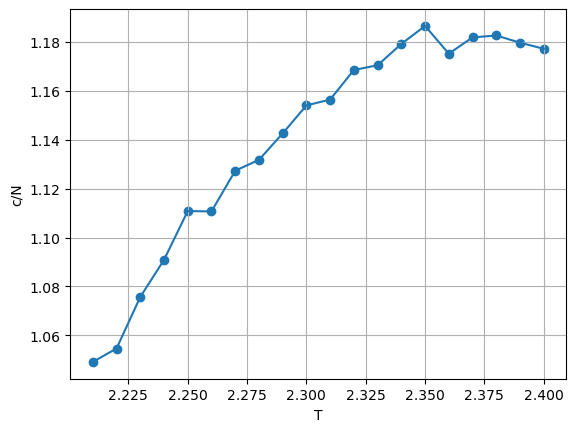

In [4]:
plt.plot(t_p, calor_esp_64)
plt.scatter(t_p, calor_esp_64)
plt.xlabel('T')
plt.ylabel('c/N')
plt.grid()

[2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3, 2.31, 2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4]
[1.0554555953004983, 1.062733655469688, 1.0766537138267642, 1.0901432877289179, 1.1095055565113758, 1.1108741470429533, 1.1328836834411862, 1.1380538664722095, 1.1506433971442567, 1.1562075275027663, 1.1584992800484952, 1.16675205057887, 1.173698084743417, 1.1789281695258624, 1.1816925618613459, 1.1836830127355604, 1.1808952921388742, 1.1866960564133893, 1.1846508464481496, 1.1758270345032493]
[1.267286913426674, 1.3027543923405438, 1.337814105015677, 1.3653143348899055, 1.4113862519397689, 1.4367905968306205, 1.466412436338082, 1.5002984176336818, 1.5038296398577948, 1.519298502948987, 1.5175076611943463, 1.5465146584423541, 1.5379750546052633, 1.532811612447747, 1.5298885575434478, 1.5062175916253138, 1.4916021013858856, 1.4741610453542258, 1.4503719362819325, 1.4291541176087208]
[1.4114267973342243, 1.4758510370707918, 1.53071783204163, 1.5683936092979442, 1.6702087

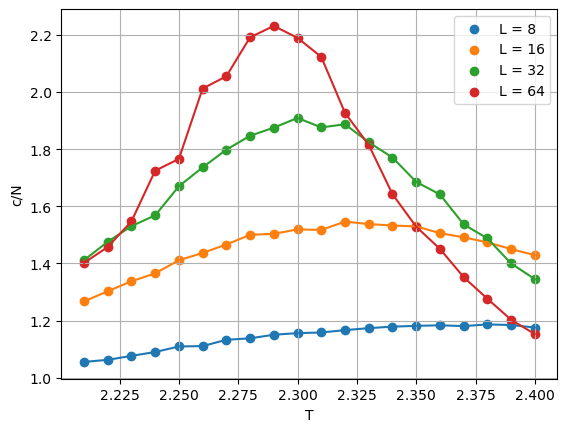

In [136]:
#plt.title('Calor especifíco por sítio em funcão da tempertura')
plt.xlabel('T')
plt.ylabel('c/N')
plt.scatter(t_p, calor_esp_8)
plt.scatter(t_p, calor_esp_16)
plt.scatter(t_p, calor_esp_32)
plt.scatter(t_p, calor_esp_64)
plt.plot(t_p, calor_esp_8)
plt.plot(t_p, calor_esp_16)
plt.plot(t_p, calor_esp_32)
plt.plot(t_p, calor_esp_64)
plt.grid()
plt.legend(['L = 8','L = 16', 'L = 32', 'L = 64'])
print(t_p)
print(calor_esp_8)
print(calor_esp_16)
print(calor_esp_32)
print(calor_esp_64)

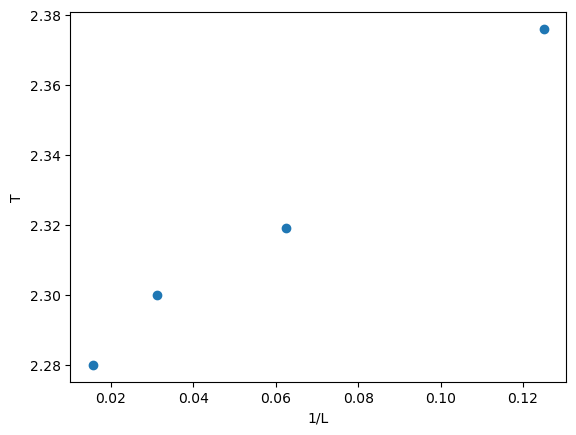

In [192]:
t_c = np.array([2.3, 2.28, 2.319, 2.376])
tm_L = np.array([(1/32), (1/64), (1/16), (1/8)])
plt.scatter(tm_L, t_c)
plt.xlabel('1/L')
plt.ylabel('T')
plt.show()

In [193]:
media_tamL = np.mean(tm_L)
meida_tc = np.mean(t_c)
erro_tamL = tm_L - media_tamL
erro_tc = t_c - meida_tc
soma_erro_tamL_tc = np.sum(erro_tamL * erro_tc)
erro_tamL_q = (tm_L - media_tamL)**2.0
soma_erro_tamL_q = np.sum(erro_tamL_q)
m = round(soma_erro_tamL_tc/soma_erro_tamL_q, 4)

In [194]:
c = round(meida_tc - m * media_tamL, 4)
print(c)

2.2688


In [195]:
reta = m * tm_L + c

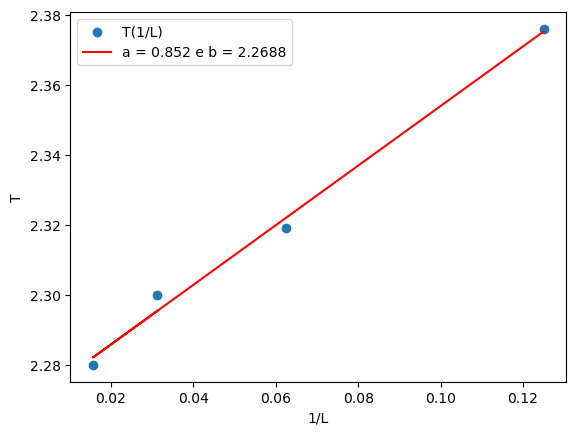

In [196]:
plt.scatter(tm_L, t_c,label='T(1/L)')
plt.plot(tm_L, reta, label=f'a = {m} e b = {c}', color='red')
plt.xlabel('1/L')
plt.ylabel('T')
plt.legend()
plt.show()